## Problem 1: Visualize a static map (8 points)

In [1]:
import geopandas as gpd
from pyproj import CRS
import matplotlib.pyplot as plt
import contextily as ctx
%matplotlib inline

# Read in the two datasets:
# 1. Shopping center locations geocoded for this excercise in the file shopping_center_locations.shp.
fp1 = r"datasets/shopping_center_locations.shp"
shop_locs = gpd.read_file(fp1)

# 2. analysis output from the previous excercise: travel times and dominance areas of the shopping centers.
fp2 = r"datasets/travel_times_and_dominance_areas.shp"
trav_dom = gpd.read_file(fp2)

In [2]:
# Print crs's.
print("Before")
print(shop_locs.crs)
print(trav_dom.crs)
print()

# Set crs to Web Mercator. Reproject.
crs = CRS.from_epsg(3857) 
shop_locs = shop_locs.to_crs(crs)
trav_dom = trav_dom.to_crs(crs)

# Print after projection.
print("After")
print(shop_locs.crs)
print(trav_dom.crs)

# Be explicit.
if shop_locs.crs == trav_dom.crs == 3857:
    print("Both layers have the Web Mercator projection.")
else:
    print("Reproject the layers to the Web Mercator.")

Before
epsg:4326
epsg:3067

After
epsg:3857
epsg:3857
Both layers have the Web Mercator projection.


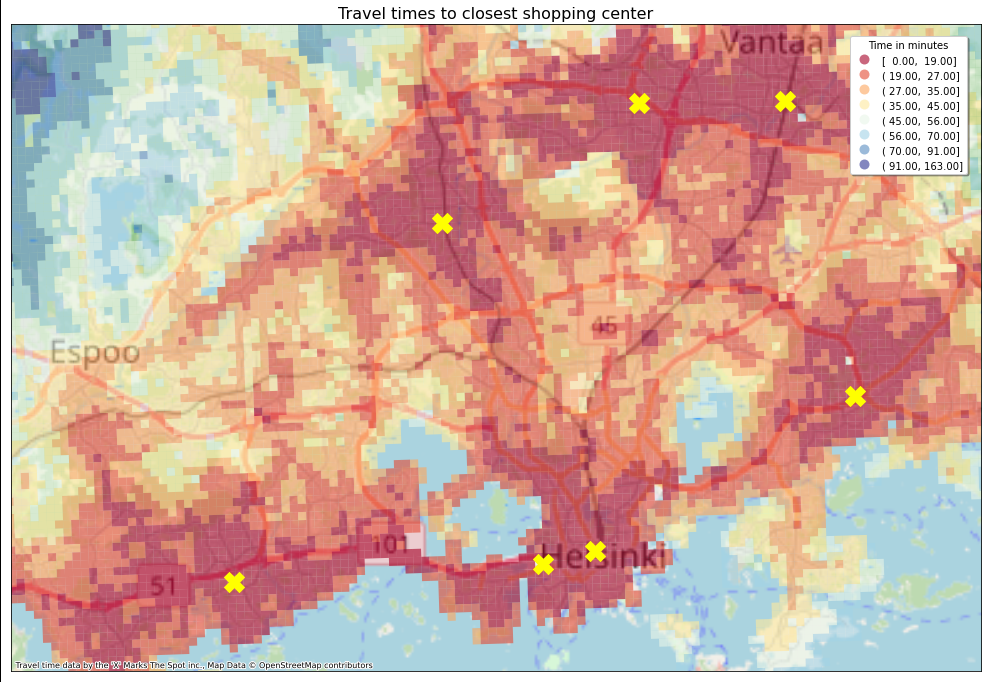

In [172]:
# Create figure and axes. Determine size, edge features and subplot.
fig = plt.figure(figsize=(14,10), linewidth=1, edgecolor="#000000")
ax = fig.add_subplot(111)

# Make sure the padding around the plot is white.
fig.patch.set_facecolor('xkcd:white')

# Set the legend title, location and shadow.
legdict1 = {'loc' : 'upper left', 
            'bbox_to_anchor' : (0.86, 0.99), 
            'shadow' : True, 'title' : 'Time in minutes'}

# Plot travel times.
trav_dom.plot(ax=ax, column="min_t", scheme="naturalbreaks", k=8, cmap="RdYlBu", 
              legend=True, legend_kwds=legdict1, alpha=0.6)

# Set the title.
ax.set_title('Travel times to closest shopping center', fontsize=16)

# Plot shopping center locations. "...and 'X' never, ever marks the spot!".
shop_locs.plot(ax=ax, marker='X', markersize=400, color="yellow", legend=True)

# Hide coordinate values and ticks from axes. Retain the frame aroung the plot.
#plt.axis('off')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

# Retrieve the base map from the OpenStreetMap service.
ctx.add_basemap(ax, zoom=10, 
                attribution="Travel time data by the 'X' Marks The Spot inc., Map Data © OpenStreetMap contributors", 
                source=ctx.providers.OpenStreetMap.Mapnik)

# Crop the figure
ax.set_xlim(2740000, 2800000)
ax.set_ylim(8430000, 8470000)

# Use tight layout
#plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.5) # Can't use these.
plt.tight_layout()

# Extremely hard to get a second legend on a plot and get the right handles for it in right colors from a dataframe.
# Had to let go of that idea after a very, very long push for it.
# The shopping center names were left out because of that.
# I gave my everything for it -- for now.
# There may be controls for many plot features in matplotlib, 
# but getting to know the right switches and the right way to use them seems to require much effort.

# Save the figure as png file with resolution of 300 dpi
outfp = "docs/Static_map_travel_times_to_shopping_centers.png"
plt.savefig(outfp, dpi=96)#edgecolor=fig.get_edgecolor()